In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df1 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df2 = pd.read_csv('Unemployment in India.csv')

print(df1.head())
print(df2.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [8]:
# Check for missing values and data types
print(df1.info())
print(df2.info())

# Summary stats
print(df1.describe())
print(df2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeInde

In [9]:
print(df1.columns)
print(df2.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [10]:
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

In [11]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')

C:\Users\shrut\AppData\Local\Temp\ipykernel_13164\514809218.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
C:\Users\shrut\AppData\Local\Temp\ipykernel_13164\514809218.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')


In [13]:
df1.rename(columns={'Estimated Unemployment Rate (%)': 'Unemployment Rate'}, inplace=True)
df2.rename(columns={'Region': 'State'}, inplace=True)

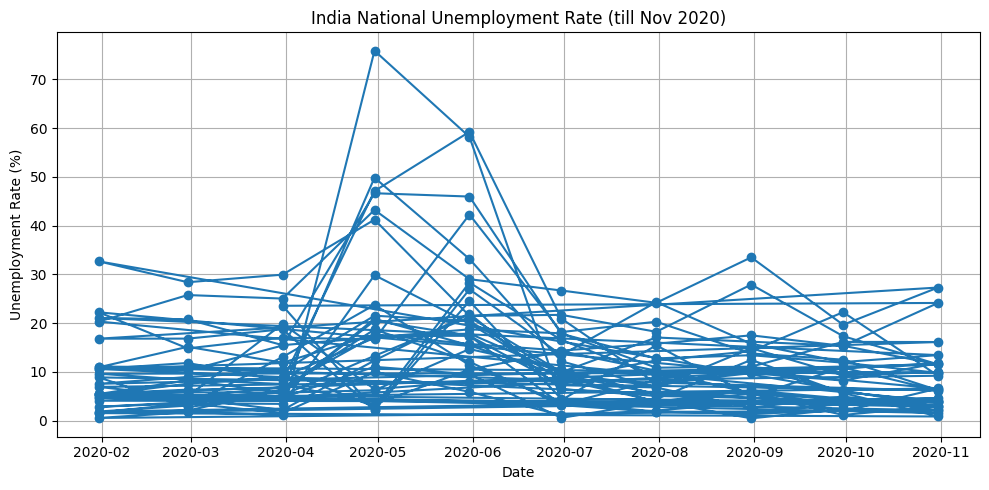

In [14]:
plt.figure(figsize=(10,5))
plt.plot(df1['Date'], df1['Unemployment Rate'], marker='o')
plt.title('India National Unemployment Rate (till Nov 2020)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\shrut\AppData\Local\Temp\ipykernel_13164\1050255607.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.values, y=state_avg.index, palette='magma')


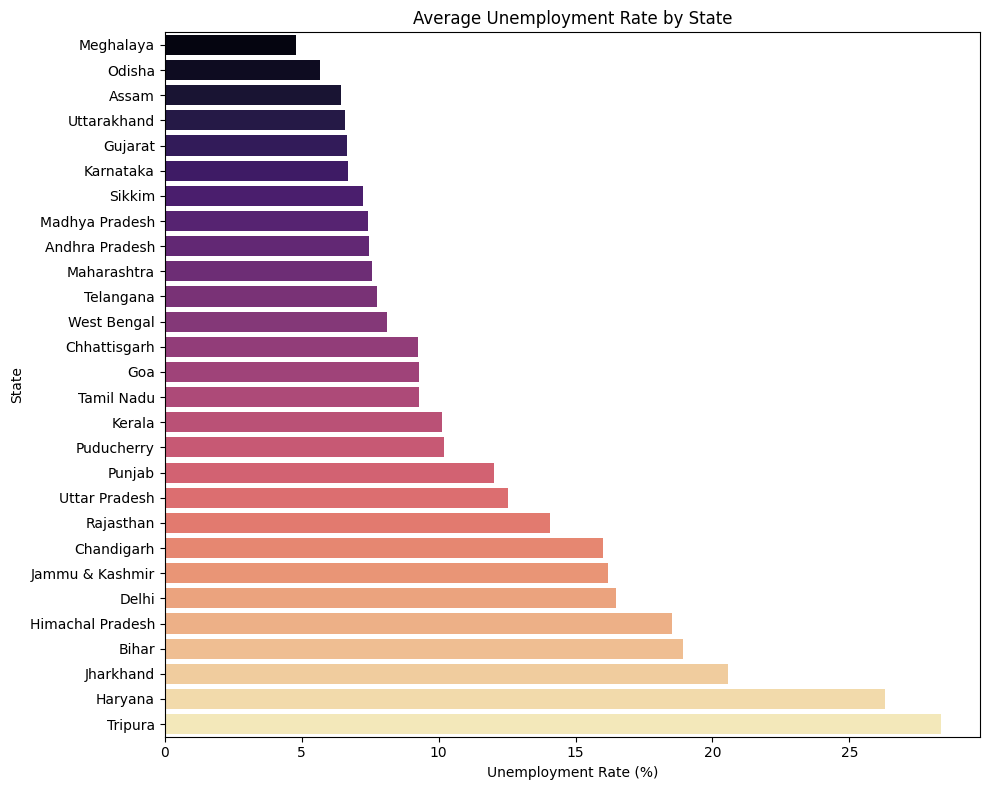

In [15]:
# Let's average unemployment by state
state_avg = df2.groupby('State')['Estimated Unemployment Rate (%)'].mean().sort_values()

plt.figure(figsize=(10,8))
sns.barplot(x=state_avg.values, y=state_avg.index, palette='magma')
plt.title('Average Unemployment Rate by State')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('State')
plt.tight_layout()
plt.show()